In [32]:
import ephem
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [106]:
observer = ephem.Observer()
observer.lat = "35:58:10"
observer.lon = "-84:19:0"
observer.date = (2018, 5, 26, 22, 0, 0)

moon = ephem.Moon()

In [107]:
lib_lat = []
lib_lon = []
lib_tot = []
phase_angle = []
time_steps = 1000
time_constant = 1.0
for i in range(time_steps):
    moon.compute(observer)
    lib_lat.append(moon.libration_lat)
    lib_lon.append(moon.libration_long)
    tot = math.sqrt(lib_lat[-1]**2 + lib_lon[-1]**2)
    pa = math.atan2(lib_lon[-1], lib_lat[-1])
    pa += 2.0 * math.pi if pa < 0 else 0.0
    phase_angle.append(pa)
    #tot *= sign
    lib_tot.append(tot)
    observer.date += time_constant * ephem.hour

In [108]:
alib_lat = np.degrees(np.array(lib_lat))
alib_lon = np.degrees(np.array(lib_lon))
alib_tot = np.degrees(np.array(lib_tot))
aphase_angle = np.degrees(np.array(phase_angle))
time = np.arange(time_steps)

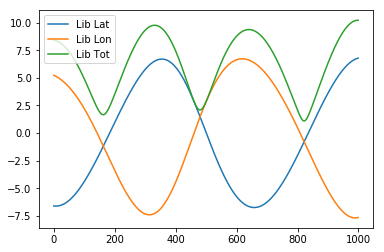

In [109]:
plt.plot(time, alib_lat, label="Lib Lat")
plt.plot(time, alib_lon, label="Lib Lon")
plt.plot(time, alib_tot, label="Lib Tot")
plt.legend()
plt.show()

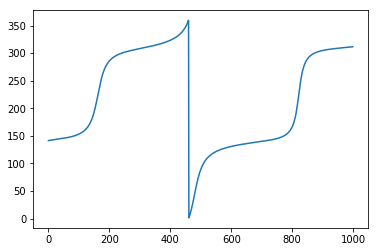

In [110]:
plt.plot(time, aphase_angle)
plt.show()

In [111]:
x = np.cos(np.radians(aphase_angle))
y = np.sin(np.radians(aphase_angle))

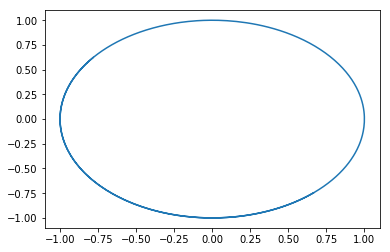

In [112]:
plt.plot(x, y)

In [59]:
x[180:220]

array([-0.99655939, -0.99845168, -0.99956078, -0.99998813, -0.99982505,
       -0.99915326, -0.99804544, -0.99656595, -0.99477154, -0.99271207,
       -0.99043121, -0.98796708, -0.98535291, -0.98261755, -0.97978602,
       -0.97687995, -0.973918  , -0.97091625, -0.96788849, -0.96484652,
       -0.96180043, -0.95875879, -0.95572885, -0.95271674, -0.94972758,
       -0.94676564, -0.94383445, -0.94093688, -0.93807526, -0.93525142,
       -0.93246677, -0.92972239, -0.92701902, -0.92435714, -0.92173701,
       -0.9191587 , -0.9166221 , -0.91412695, -0.91167291, -0.9092595 ])

In [60]:
y[180:220]

array([-0.08288173, -0.05562588, -0.02963516, -0.00487261,  0.01870455,
        0.04114311,  0.06249233,  0.08280277,  0.10212529,  0.12051033,
        0.13800732,  0.15466429,  0.17052754,  0.18564145,  0.20004839,
        0.21378861,  0.22690025,  0.23941937,  0.25137994,  0.26281398,
        0.27375158,  0.28422102,  0.29424881,  0.30385987,  0.31307751,
        0.32192363,  0.33041872,  0.33858202,  0.34643153,  0.35398416,
        0.36125575,  0.36826115,  0.37501432,  0.38152834,  0.38781552,
        0.3938874 ,  0.39975484,  0.40542806,  0.41091667,  0.4162297 ])